In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from tabulate import tabulate
from colorama import Fore, Style
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df = pd.read_csv('cardio_data.csv', header = 0)

In [3]:
df

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,03-04-2018,Singapore,99993,1,19240,0,120,80,1,2,1,168,Doctor,1,76.0,0
69996,12-01-2022,Malaysia,99995,1,22601,0,140,90,2,1,2,158,Accountant,0,126.0,1
69997,25-08-2022,Malaysia,99996,0,19066,1,180,90,3,2,1,183,Accountant,0,105.0,1
69998,13-07-2020,Singapore,99998,0,22431,0,135,80,1,1,2,163,Accountant,0,72.0,1


## EDD  (Extended Data Dictionary)

In [4]:
df.head

<bound method NDFrame.head of              date    country     id  active    age  alco  ap_hi  ap_lo  \
0      03-05-2021  Indonesia      0       1  18393     0    110     80   
1      05-08-2021   Malaysia      1       1  20228     0    140     90   
2      13-11-2022  Indonesia      2       0  18857     0    130     70   
3      31-10-2018  Singapore      3       1  17623     0    150    100   
4      25-09-2020  Singapore      4       0  17474     0    100     60   
...           ...        ...    ...     ...    ...   ...    ...    ...   
69995  03-04-2018  Singapore  99993       1  19240     0    120     80   
69996  12-01-2022   Malaysia  99995       1  22601     0    140     90   
69997  25-08-2022   Malaysia  99996       0  19066     1    180     90   
69998  13-07-2020  Singapore  99998       0  22431     0    135     80   
69999  15-01-2018  Singapore  99999       1  20540     0    120     80   

       cholesterol  gender  gluc  height  occupation  smoke  weight  disease  
0 

In [5]:
df.shape

(70000, 16)

In [6]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


Average age of people is 53.30

Average people of disease is 0.49

various outliers found in 'ap_hi' and 'ap_lo' columns 

Negative value shows in "min" is not possible of blood pressure

In [7]:
# Converting age in days to years
df['age'] = df['age'] / 365.25

In [8]:
df['gender'] = df['gender'] - 1

In [9]:
print(df)

             date    country     id  active        age  alco  ap_hi  ap_lo  \
0      03-05-2021  Indonesia      0       1  50.357290     0    110     80   
1      05-08-2021   Malaysia      1       1  55.381246     0    140     90   
2      13-11-2022  Indonesia      2       0  51.627652     0    130     70   
3      31-10-2018  Singapore      3       1  48.249144     0    150    100   
4      25-09-2020  Singapore      4       0  47.841205     0    100     60   
...           ...        ...    ...     ...        ...   ...    ...    ...   
69995  03-04-2018  Singapore  99993       1  52.676249     0    120     80   
69996  12-01-2022   Malaysia  99995       1  61.878166     0    140     90   
69997  25-08-2022   Malaysia  99996       0  52.199863     1    180     90   
69998  13-07-2020  Singapore  99998       0  61.412731     0    135     80   
69999  15-01-2018  Singapore  99999       1  56.235455     0    120     80   

       cholesterol  gender  gluc  height  occupation  smoke  we

In [10]:
df

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,50.357290,0,110,80,1,1,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,55.381246,0,140,90,3,0,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,51.627652,0,130,70,3,0,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,48.249144,0,150,100,1,1,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,47.841205,0,100,60,1,0,1,156,Architect,0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,03-04-2018,Singapore,99993,1,52.676249,0,120,80,1,1,1,168,Doctor,1,76.0,0
69996,12-01-2022,Malaysia,99995,1,61.878166,0,140,90,2,0,2,158,Accountant,0,126.0,1
69997,25-08-2022,Malaysia,99996,0,52.199863,1,180,90,3,1,1,183,Accountant,0,105.0,1
69998,13-07-2020,Singapore,99998,0,61.412731,0,135,80,1,0,2,163,Accountant,0,72.0,1


In [11]:
# Checking Null Values
null_values = df.isna().sum()

In [12]:
print(null_values)

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


In [13]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  float64
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 8.5+ MB


There are no missing values in the data.

## Visualizations and Charts

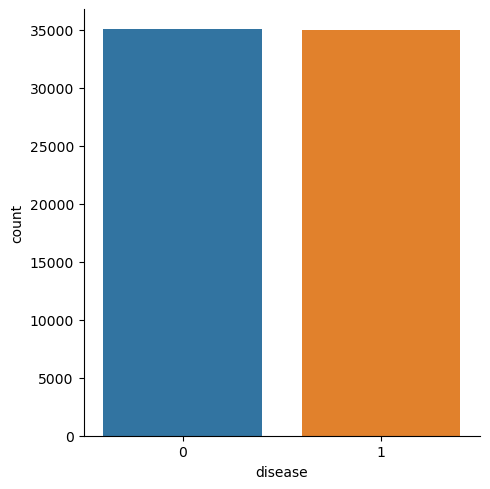

In [14]:
# Disease (Almost half of Patient have disease)
sns.catplot(x="disease", data=df, kind="count",)

<Axes: xlabel='active', ylabel='count'>

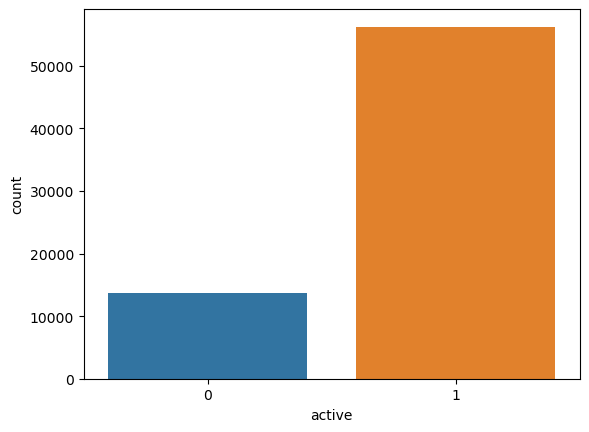

In [15]:
# The physical activity of the patient.
sns.countplot(x='active', data = df)

<Axes: xlabel='country', ylabel='count'>

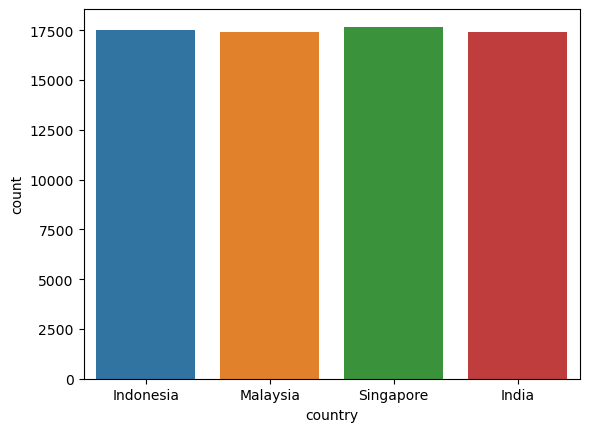

In [16]:
# Countries of data ( Indonesia, Malaysia, Singapore, India)
sns.countplot(x='country', data = df)

<Axes: xlabel='gender', ylabel='count'>

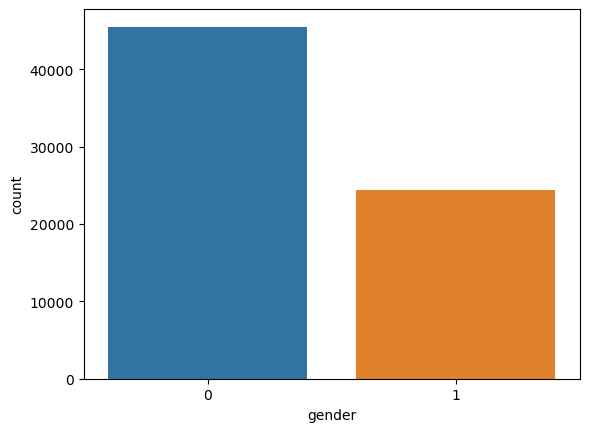

In [17]:
# Gender wise (Female: 0, Male: 1)
sns.countplot(x='gender', data = df)

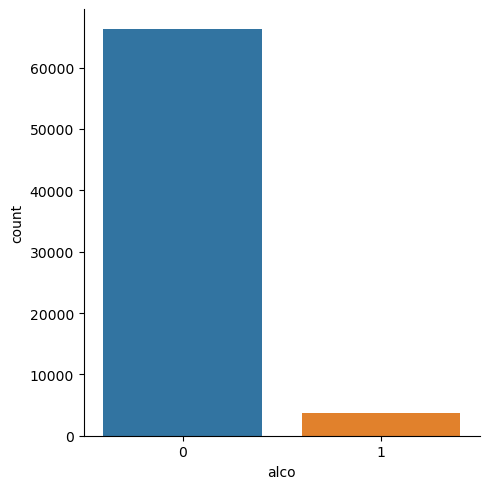

In [18]:
# Alcoholic intake
sns.catplot(x="alco", data=df, kind="count",)

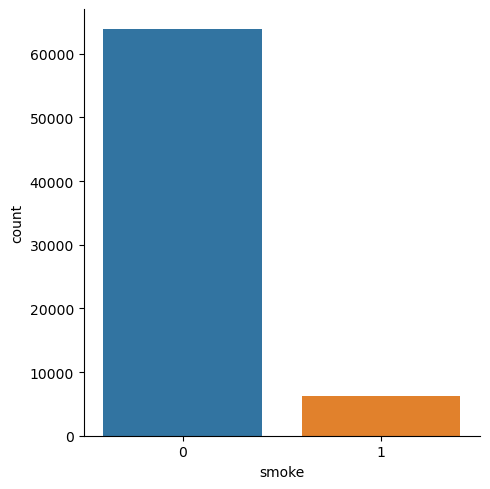

In [19]:
# Smokers data
sns.catplot(x="smoke", data=df, kind="count",)

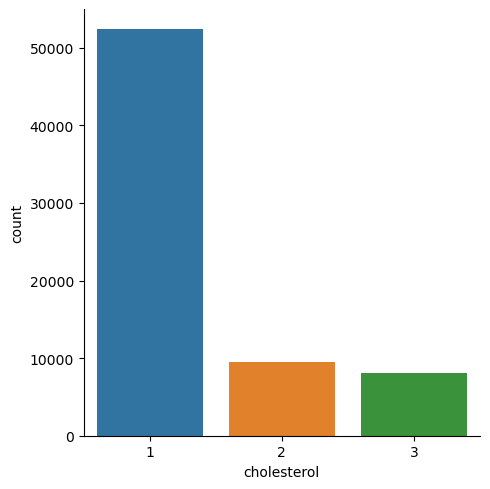

In [20]:
# Cholesterol level of the patient. (Normal:1 , Above normal : 2, High: 3)
sns.catplot(x="cholesterol", data=df, kind="count",)

<Axes: ylabel='Density'>

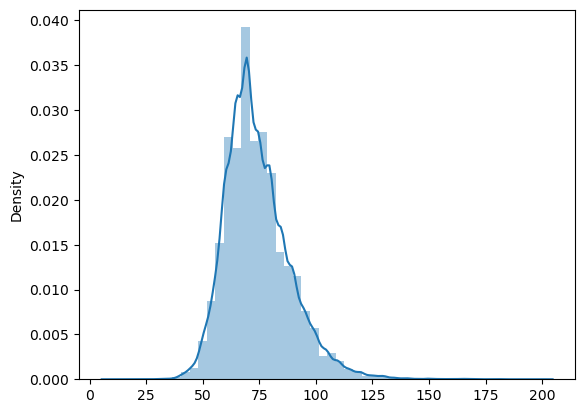

In [21]:
sns.distplot(x=df['weight'])

<Axes: ylabel='Density'>

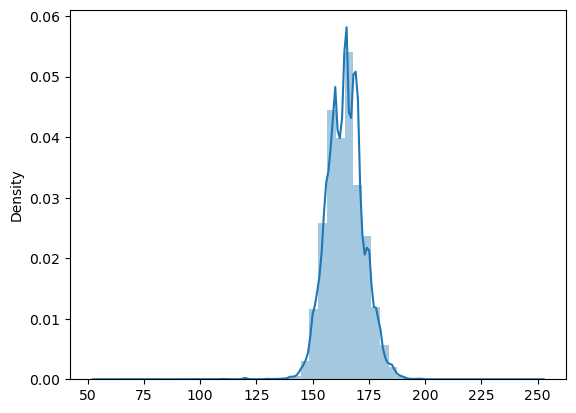

In [22]:
sns.distplot(x=df['height'])

<Axes: xlabel='gluc', ylabel='count'>

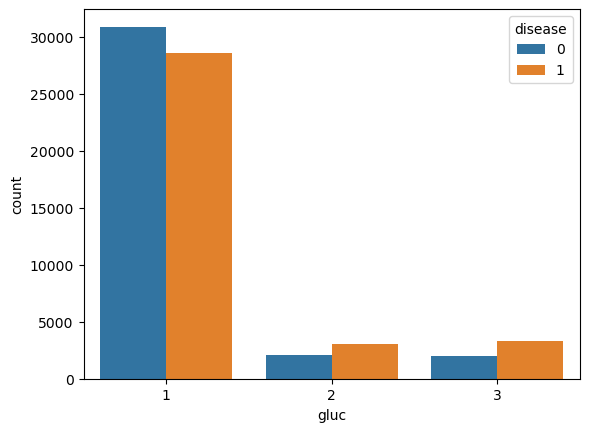

In [23]:
sns.countplot(x=df['gluc'],hue=df['disease'])

## Pre-Processing Data

In [24]:
df.drop('id',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.drop('country',axis=1,inplace=True)
df.drop('occupation',axis=1,inplace=True)

In [25]:
df

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
0,1,50.357290,0,110,80,1,1,1,168,0,62.0,0
1,1,55.381246,0,140,90,3,0,1,156,0,85.0,1
2,0,51.627652,0,130,70,3,0,1,165,0,64.0,1
3,1,48.249144,0,150,100,1,1,1,169,0,82.0,1
4,0,47.841205,0,100,60,1,0,1,156,0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,52.676249,0,120,80,1,1,1,168,1,76.0,0
69996,1,61.878166,0,140,90,2,0,2,158,0,126.0,1
69997,0,52.199863,1,180,90,3,1,1,183,0,105.0,1
69998,0,61.412731,0,135,80,1,0,2,163,0,72.0,1


<Axes: >

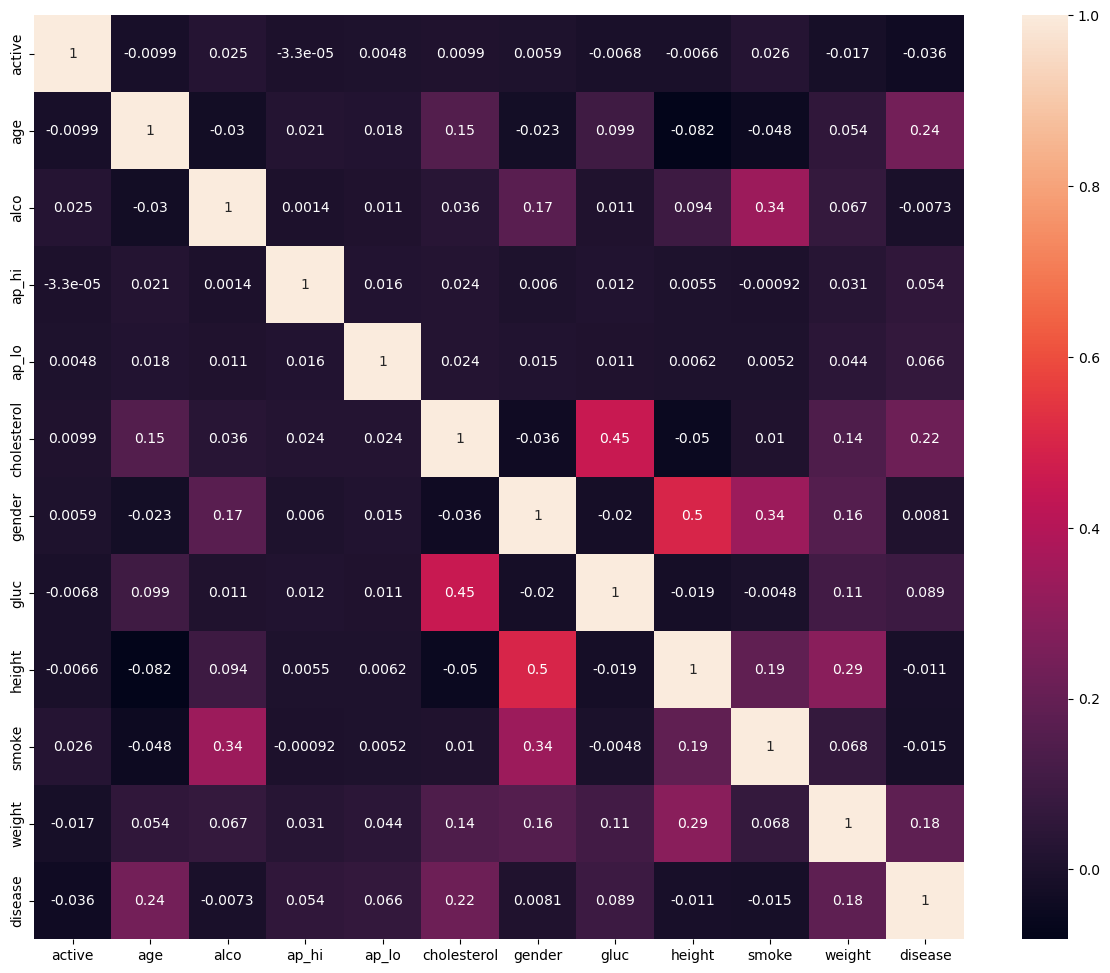

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

#### Main Cause of disease are:

1.High blood pressure
2.Smoking
3.Overwieght
4.High cholestrol

#### Outliers effect the performance of our model which is present in columns "ap_lo" and "ap_hi"

<Axes: xlabel='ap_lo'>

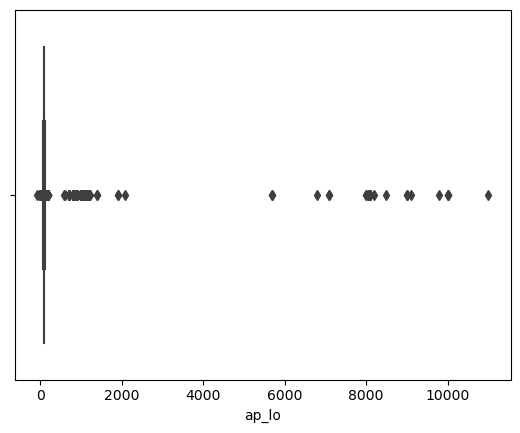

In [27]:
sns.boxplot(x=df['ap_lo'])

<Axes: xlabel='ap_hi'>

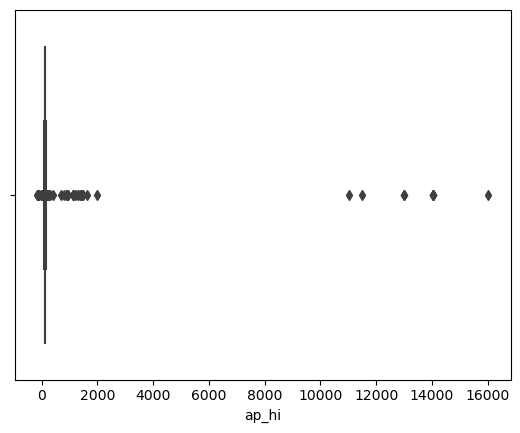

In [28]:
sns.boxplot(x=df['ap_hi'])

<Axes: xlabel='height'>

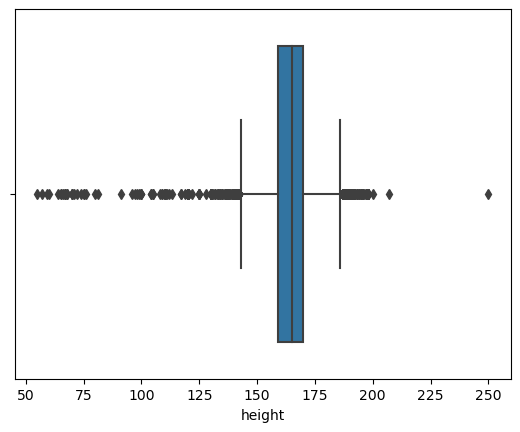

In [30]:
sns.boxplot(x=df['height'])

<Axes: xlabel='weight'>

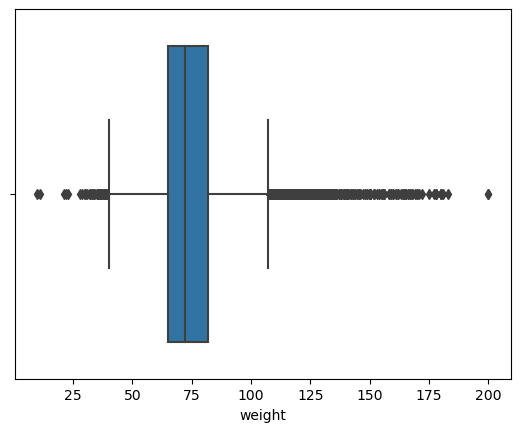

In [31]:
sns.boxplot(x=df['weight'])

In [32]:
# Remove outliers

def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [33]:
remove_outliers(df['ap_hi'])
remove_outliers(df['ap_lo'])
remove_outliers(df['height'])
remove_outliers(df['weight'])

In [34]:
df = df.dropna()

In [35]:
df

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
0,1,50.357290,0,110.0,80.0,1,1,1,168.0,0,62.0,0
1,1,55.381246,0,140.0,90.0,3,0,1,156.0,0,85.0,1
2,0,51.627652,0,130.0,70.0,3,0,1,165.0,0,64.0,1
3,1,48.249144,0,150.0,100.0,1,1,1,169.0,0,82.0,1
5,0,59.997262,0,120.0,80.0,2,0,2,151.0,0,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,53.932923,0,130.0,90.0,1,0,1,172.0,0,70.0,1
69994,1,57.697467,0,150.0,80.0,1,0,1,165.0,0,80.0,1
69995,1,52.676249,0,120.0,80.0,1,1,1,168.0,1,76.0,0
69998,0,61.412731,0,135.0,80.0,1,0,2,163.0,0,72.0,1


<Axes: xlabel='ap_hi'>

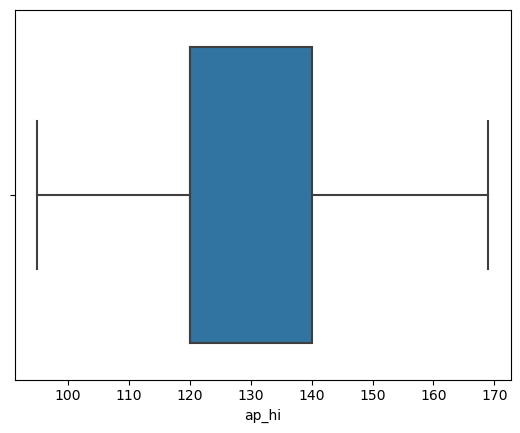

In [36]:
sns.boxplot(x=df['ap_hi'])

<Axes: xlabel='ap_lo'>

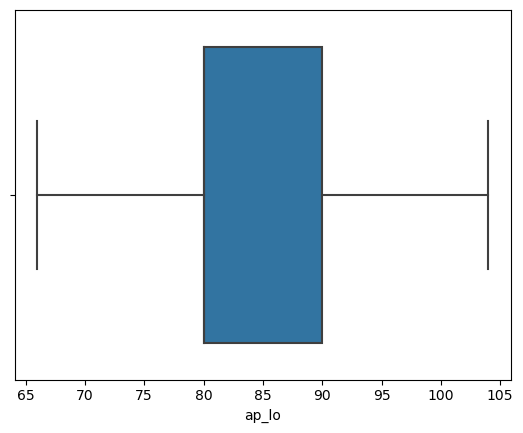

In [37]:
sns.boxplot(x=df['ap_lo'])

#### Outliers Removed

In [ ]:
df.shape

## Training and Testing 

In [40]:
x_multi = df.drop(['disease'], axis=1)
y_multi = df['disease']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## 1. Decision Tree 

In [42]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
#Predict Values 

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [44]:
#Model Performance 


cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

In [45]:
#Print the result 
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")


Confusion Matrix (Training Data):
[[19536  5586]
 [ 8311 15986]]

Accuracy Score (Training Data): 0.7187923673081204

Precision Score (Training Data): 0.741053217133321

Recall Score (Training Data): 0.6579413096267028

ROC AUC Score (Training Data): 0.7177932007889902

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4897 1372]
 [2102 3984]]

Accuracy Score (Testing Data): 0.718818292189397

Precision Score (Test Data): 0.7438386855862584

Recall Score (Test Data): 0.6546171541242195

ROC AUC Score (Test Data): 0.7178812361783962

------------------------------------------------------


## 2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

In [47]:
# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [48]:
# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

In [49]:
# Predict values using the best model
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)

In [50]:
# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

In [51]:
# Print the results for Random Forest Classifier
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")

Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[20408  4714]
 [ 7773 16524]]

Accuracy Score (Training Data): 0.7473239037617111

Precision Score (Training Data): 0.7780393634052171

Recall Score (Training Data): 0.6800839609828374

ROC AUC Score (Training Data): 0.7462198325732594

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4987 1282]
 [2073 4013]]

Accuracy Score (Testing Data): 0.7284500202347228

Precision Score (Test Data): 0.7578847969782814

Recall Score (Test Data): 0.6593821886296418

ROC AUC Score (Test Data): 0.7274419317689602

------------------------------------------------------


## 3. KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7]
}

In [53]:
# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [54]:
# Get the best parameters and model
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

In [55]:
# Predict values using the best model
y_train_pred_knn = best_knn_classifier.predict(x_train)
y_test_pred_knn = best_knn_classifier.predict(x_test)

In [56]:
# Model Performance
cfm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_pred_knn)

In [57]:
# Print the results for K-Nearest Neighbors (KNN) Model
print("K-Nearest Neighbors (KNN) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

K-Nearest Neighbors (KNN) Results:
Confusion Matrix (Training Data):
[[19921  5201]
 [ 6629 17668]]

Accuracy Score (Training Data): 0.7606183856411501

Precision Score (Training Data): 0.7725742271196817

Recall Score (Training Data): 0.7271679631230193

ROC AUC Score (Training Data): 0.7600691340175243

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4589 1680]
 [2134 3952]]

Accuracy Score (Testing Data): 0.691299069202752

Precision Score (Testing Data): 0.7017045454545454

Recall Score (Testing Data): 0.6493591850147881

ROC AUC Score (Testing Data): 0.6906869302008061

------------------------------------------------------


In [58]:
print("best hyperparameter: ", best_params_knn)

best hyperparameter:  {'n_neighbors': 7}


## 4. LDA (Linear discriminant analysis)

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
# Create an LDA model with specific parameters
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

In [61]:
# Fit the model on the training data
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [62]:
# Predict values using the model
y_train_pred_lda = lda_model.predict(x_train)
y_test_pred_lda = lda_model.predict(x_test)

In [63]:
# Model Performance
cfm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cfm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
acs_train_lda = accuracy_score(y_train, y_train_pred_lda)
acs_test_lda = accuracy_score(y_test, y_test_pred_lda)
pcs_train_lda = precision_score(y_train, y_train_pred_lda)
pcs_test_lda = precision_score(y_test, y_test_pred_lda)
rcs_train_lda = recall_score(y_train, y_train_pred_lda)
rcs_test_lda = recall_score(y_test, y_test_pred_lda)
roc_auc_score_train_lda = roc_auc_score(y_train, y_train_pred_lda)
roc_auc_score_test_lda = roc_auc_score(y_test, y_test_pred_lda)

In [64]:
# Print the results for LDA Model
print("Linear Discriminant Analysis (LDA) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lda)
print("\nAccuracy Score (Training Data):", acs_train_lda)
print("\nPrecision Score (Training Data):", pcs_train_lda)
print("\nRecall Score (Training Data):", rcs_train_lda)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lda)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lda)
print("\nAccuracy Score (Testing Data):", acs_test_lda)
print("\nPrecision Score (Testing Data):", pcs_test_lda)
print("\nRecall Score (Testing Data):", rcs_test_lda)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lda)
print("\n------------------------------------------------------")

Linear Discriminant Analysis (LDA) Results:
Confusion Matrix (Training Data):
[[20025  5097]
 [ 8692 15605]]

Accuracy Score (Training Data): 0.720977761589672

Precision Score (Training Data): 0.7537919041638489

Recall Score (Training Data): 0.642260361361485

ROC AUC Score (Training Data): 0.7196852320301573

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4989 1280]
 [2203 3883]]

Accuracy Score (Testing Data): 0.7180898421691623

Precision Score (Testing Data): 0.7520821227968235

Recall Score (Testing Data): 0.6380216891225764

ROC AUC Score (Testing Data): 0.7169211970896021

------------------------------------------------------


## 5. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [67]:
# Perform GridSearchCV
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=3, scoring='accuracy')
grid_search_logreg.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
# Get the best parameters and model
best_params_logreg = grid_search_logreg.best_params_
best_logreg_model = grid_search_logreg.best_estimator_

In [69]:
# Predict values using the best model
y_train_pred_lr= best_logreg_model.predict(x_train)
y_test_pred_lr = best_logreg_model.predict(x_test)

In [70]:
# Model Performance
cfm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
cfm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
acs_train_lr = accuracy_score(y_train, y_train_pred_lr)
acs_test_lr = accuracy_score(y_test, y_test_pred_lr)
pcs_train_lr = precision_score(y_train, y_train_pred_lr)
pcs_test_lr = precision_score(y_test, y_test_pred_lr)
rcs_train_lr = recall_score(y_train, y_train_pred_lr)
rcs_test_lr = recall_score(y_test, y_test_pred_lr)
roc_auc_score_train_lr = roc_auc_score(y_train, y_train_pred_lr)
roc_auc_score_test_lr = roc_auc_score(y_test, y_test_pred_lr)

In [71]:
# Print the results for Logistic Regression Model
print("Logistic Regression Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lr)
print("\nAccuracy Score (Training Data):", acs_train_lr)
print("\nPrecision Score (Training Data):", pcs_train_lr)
print("\nRecall Score (Training Data):", rcs_train_lr)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lr)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lr)
print("\nAccuracy Score (Testing Data):", acs_test_lr)
print("\nPrecision Score (Testing Data):", pcs_test_lr)
print("\nRecall Score (Testing Data):", rcs_test_lr)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lr)
print("\n------------------------------------------------------")

Logistic Regression Results:
Confusion Matrix (Training Data):
[[19230  5892]
 [ 8386 15911]]

Accuracy Score (Training Data): 0.7110827819259798

Precision Score (Training Data): 0.7297619593633904

Recall Score (Training Data): 0.6548545087870931

ROC AUC Score (Training Data): 0.7101595209328349

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4824 1445]
 [2170 3916]]

Accuracy Score (Testing Data): 0.707405908539053

Precision Score (Testing Data): 0.7304607349375116

Recall Score (Testing Data): 0.6434439697666776

ROC AUC Score (Testing Data): 0.7064723437922558

------------------------------------------------------


In [72]:
print("best hyperparameter: ", best_params_logreg)

best hyperparameter:  {'C': 0.001, 'penalty': 'l2'}


## 6. XGBOOST

In [73]:
from xgboost import XGBClassifier

In [74]:
# Create an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [75]:
# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [76]:
# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_classifier = grid_search_xgb.best_estimator_

In [77]:
# Predict values using the best model
y_train_pred_xgb = best_xgb_classifier.predict(x_train)
y_test_pred_xgb = best_xgb_classifier.predict(x_test)

In [78]:
# Model Performance
cfm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cfm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
acs_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acs_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
pcs_train_xgb = precision_score(y_train, y_train_pred_xgb)
pcs_test_xgb = precision_score(y_test, y_test_pred_xgb)
rcs_train_xgb = recall_score(y_train, y_train_pred_xgb)
rcs_test_xgb = recall_score(y_test, y_test_pred_xgb)
roc_auc_score_train_xgb = roc_auc_score(y_train, y_train_pred_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test, y_test_pred_xgb)

In [79]:
# Print the results for XGBoost Classifier
print("XGBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Testing Data):", pcs_test_xgb)
print("\nRecall Score (Testing Data):", rcs_test_xgb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

XGBoost Classifier Results:
Confusion Matrix (Training Data):
[[19618  5504]
 [ 7732 16565]]

Accuracy Score (Training Data): 0.7321677897165058

Precision Score (Training Data): 0.7506003896868911

Recall Score (Training Data): 0.6817714121084908

ROC AUC Score (Training Data): 0.7313402876958344

------------------------------------------------------

Confusion Matrix (Testing Data):
[[4869 1400]
 [1992 4094]]

Accuracy Score (Testing Data): 0.7254552812626467

Precision Score (Testing Data): 0.7451765562431744

Recall Score (Testing Data): 0.6726914229378902

ROC AUC Score (Testing Data): 0.7246851595467885

------------------------------------------------------


## 7. SVM

In [80]:
from sklearn.svm import SVC  # Import the SVC class from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [81]:
# Create an SVC classifier object
clf_svm = SVC(max_iter=1000)  # Set maximum iterations to avoid potential convergence issues

In [82]:
# Train the SVM model
clf_svm.fit(x_train, y_train)

SVC(max_iter=1000)

In [83]:
# Predict class labels for training and testing data
y_train_pred_svm = clf_svm.predict(x_train)
y_test_pred_svm = clf_svm.predict(x_test)

In [84]:
# Evaluate model performance

# Training data performance
cfm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
acs_train_svm = accuracy_score(y_train, y_train_pred_svm)
pcs_train_svm = precision_score(y_train, y_train_pred_svm)
rcs_train_svm = recall_score(y_train, y_train_pred_svm)
roc_auc_score_train_svm = roc_auc_score(y_train, y_train_pred_svm)

# Testing data performance
cfm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
acs_test_svm = accuracy_score(y_test, y_test_pred_svm)
pcs_test_svm = precision_score(y_test, y_test_pred_svm)
rcs_test_svm = recall_score(y_test, y_test_pred_svm)
roc_auc_score_test_svm = roc_auc_score(y_test, y_test_pred_svm)

In [85]:
# Print the results

print("SVM Classification Results:")

print("\nConfusion Matrix (Training Data):")
print(cfm_train_svm)

print("\nAccuracy Score (Training Data):", acs_train_svm)
print("\nPrecision Score (Training Data):", pcs_train_svm)
print("\nRecall Score (Training Data):", rcs_train_svm)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_svm)

print("\n------------------------------------------------------")

print("\nConfusion Matrix (Testing Data):")
print(cfm_test_svm)

print("\nAccuracy Score (Testing Data):", acs_test_svm)
print("\nPrecision Score (Test Data):", pcs_test_svm)
print("\nRecall Score (Test Data):", rcs_test_svm)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_svm)

print("\n------------------------------------------------------")


SVM Classification Results:

Confusion Matrix (Training Data):
[[ 4849 20273]
 [ 1101 23196]]

Accuracy Score (Training Data): 0.5674942835751432

Precision Score (Training Data): 0.5336216614138811

Recall Score (Training Data): 0.9546857636745277

ROC AUC Score (Training Data): 0.5738519177420485

------------------------------------------------------

Confusion Matrix (Testing Data):
[[1215 5054]
 [ 277 5809]]

Accuracy Score (Testing Data): 0.5685147713476325

Precision Score (Test Data): 0.534750989597717

Recall Score (Test Data): 0.9544857048964838

ROC AUC Score (Test Data): 0.5741482600092565

------------------------------------------------------


## 8. ADA (Adaptive Boosting)

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [87]:
# Create an AdaBoostClassifier object
clf_adaboost = AdaBoostClassifier(n_estimators=50)  # Set number of weak learners (default=50)

In [88]:
# Train the AdaBoost model
clf_adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [89]:
# Predict class labels for training and testing data
y_train_pred_adaboost = clf_adaboost.predict(x_train)
y_test_pred_adaboost = clf_adaboost.predict(x_test)

In [90]:
# Evaluate model performance

# Training data performance
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)

# Testing data performance
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

In [91]:
# Print the results

print("AdaBoost Classification Results:")

print("\nConfusion Matrix (Training Data):")
print(cfm_train_adaboost)

print("\nAccuracy Score (Training Data):", acs_train_adaboost)
print("\nPrecision Score (Training Data):", pcs_train_adaboost)
print("\nRecall Score (Training Data):", rcs_train_adaboost)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_adaboost)

print("\n------------------------------------------------------")

print("\nConfusion Matrix (Testing Data):")
print(cfm_test_adaboost)

print("\nAccuracy Score (Testing Data):", acs_test_adaboost)
print("\nPrecision Score (Test Data):", pcs_test_adaboost)
print("\nRecall Score (Test Data):", rcs_test_adaboost)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_adaboost)

print("\n------------------------------------------------------")

AdaBoost Classification Results:

Confusion Matrix (Training Data):
[[20334  4788]
 [ 8747 15550]]

Accuracy Score (Training Data): 0.7261174851777656

Precision Score (Training Data): 0.7645786213000295

Recall Score (Training Data): 0.6399967074124377

ROC AUC Score (Training Data): 0.7247033931139094

------------------------------------------------------

Confusion Matrix (Testing Data):
[[5044 1225]
 [2250 3836]]

Accuracy Score (Testing Data): 0.7187373532982598

Precision Score (Test Data): 0.7579529737206085

Recall Score (Test Data): 0.6302990469930989

ROC AUC Score (Test Data): 0.7174465405646624

------------------------------------------------------


## Comparing Models

In [92]:
# Logistic Regression

print(f"Logistic Regression - Accuracy Score (Train): {acs_train_lr * 100:.4f}%")
print(f"Logistic Regression - Accuracy Score (Test): {acs_test_lr * 100:.4f}%")
print(f"Logistic Regression - ROC AUC Score (Test): {roc_auc_score_test_lr:.4f}")
print(f"Logistic Regression - Recall Score (Test): {rcs_test_lr:.4f}")
print(f"Logistic Regression - Precision Score (Test): {pcs_test_lr:.4f}")
print("="*60)  

# K-Nearest Neighbors
print(f"K-Nearest Neighbors - Accuracy Score (Train): {acs_train_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - Accuracy Score (Test): {acs_test_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - ROC AUC Score (Test): {roc_auc_score_test_knn:.4f}")
print(f"K-Nearest Neighbors - Recall Score (Test): {rcs_test_knn:.4f}")
print(f"K-Nearest Neighbors - Precision Score (Test): {pcs_test_knn:.4f}")
print("="*60)  

# Linear Discriminant Analysis
print(f"Linear Discriminant Analysis - Accuracy Score (Train): {acs_train_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - Accuracy Score (Test): {acs_test_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - ROC AUC Score (Test): {roc_auc_score_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Recall Score (Test): {rcs_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Precision Score (Test): {pcs_test_lda:.4f}")
print("="*60)

# Decision Tree
print(f"Decision Tree - Accuracy Score (Train): {acs_train_ct * 100:.4f}%")
print(f"Decision Tree - Accuracy Score (Test): {acs_test_ct * 100:.4f}%")
print(f"Decision Tree - ROC AUC Score (Test): {roc_auc_score_test:.4f}")
print(f"Decision Tree - Recall Score (Test): {rcs_test_ct:.4f}")
print(f"Decision Tree - Precision Score (Test): {pcs_test_ct:.4f}")
print("="*60)  # Double line

# Random Forest
print(f"Random Forest - Accuracy Score (Train): {acs_train_rf * 100:.4f}%")
print(f"Random Forest - Accuracy Score (Test): {acs_test_rf * 100:.4f}%")
print(f"Random Forest - ROC AUC Score (Test): {roc_auc_score_test_rf:.4f}")
print(f"Random Forest - Recall Score (Test): {rcs_test_rf:.4f}")
print(f"Random Forest - Precision Score (Test): {pcs_test_rf:.4f}")
print("="*60) 

# AdaBoost
print(f"AdaBoost - Accuracy Score (Train): {acs_train_adaboost * 100:.4f}%")
print(f"AdaBoost - Accuracy Score (Test): {acs_test_adaboost * 100:.4f}%")
print(f"AdaBoost - ROC AUC Score (Test): {roc_auc_score_test_adaboost:.4f}")
print(f"AdaBoost - Recall Score (Test): {rcs_test_adaboost:.4f}")
print(f"AdaBoost - Precision Score (Test): {pcs_test_adaboost:.4f}")
print("="*60) 

# XGBoost
print(f"XGBoost - Accuracy Score (Train): {acs_train_xgb * 100:.4f}%")
print(f"XGBoost - Accuracy Score (Test): {acs_test_xgb * 100:.4f}%")
print(f"XGBoost - ROC AUC Score (Test): {roc_auc_score_test_xgb:.4f}")
print(f"XGBoost - Recall Score (Test): {rcs_test_xgb:.4f}")
print(f"XGBoost - Precision Score (Test): {pcs_test_xgb:.4f}")
print("="*60) 

# SVM
print(f"SVM - Accuracy Score (Train): {acs_train_svm * 100:.4f}%")
print(f"SVM - Accuracy Score (Test): {acs_test_svm * 100:.4f}%")
print(f"SVM - ROC AUC Score (Test): {roc_auc_score_test_svm:.4f}")
print(f"SVM - Recall Score (Test): {rcs_test_svm:.4f}")
print(f"SVM - Precision Score (Test): {pcs_test_svm:.4f}")


Logistic Regression - Accuracy Score (Train): 71.1083%
Logistic Regression - Accuracy Score (Test): 70.7406%
Logistic Regression - ROC AUC Score (Test): 0.7065
Logistic Regression - Recall Score (Test): 0.6434
Logistic Regression - Precision Score (Test): 0.7305
K-Nearest Neighbors - Accuracy Score (Train): 76.0618%
K-Nearest Neighbors - Accuracy Score (Test): 69.1299%
K-Nearest Neighbors - ROC AUC Score (Test): 0.6907
K-Nearest Neighbors - Recall Score (Test): 0.6494
K-Nearest Neighbors - Precision Score (Test): 0.7017
Linear Discriminant Analysis - Accuracy Score (Train): 72.0978%
Linear Discriminant Analysis - Accuracy Score (Test): 71.8090%
Linear Discriminant Analysis - ROC AUC Score (Test): 0.7169
Linear Discriminant Analysis - Recall Score (Test): 0.6380
Linear Discriminant Analysis - Precision Score (Test): 0.7521
Decision Tree - Accuracy Score (Train): 71.8792%
Decision Tree - Accuracy Score (Test): 71.8818%
Decision Tree - ROC AUC Score (Test): 0.7179
Decision Tree - Recall S

According to Cardio Data Analysis I perform 8 different models in which KNN (K-Nearest Neighbors) got Maxmimum Accuracy of 76.06% followed by Random forest 74.73%

## Thanks